In [1]:
import pandas as pd

In [5]:
kelereng = {'diameter' : [5,2,4,10,15,9],
           'harga' : [3,1,2,8.3,13,7]}

kelereng_df = pd.DataFrame(kelereng)
kelereng_df

,diameter,harga
0,5,3.0
1,2,1.0
2,4,2.0
3,10,8.3
4,15,13.0
5,9,7.0


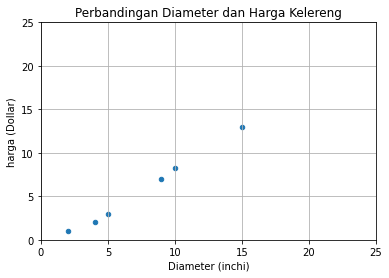

In [10]:
import matplotlib.pyplot as plt
kelereng_df.plot(kind='scatter', x='diameter', y='harga')

plt.title("Perbandingan Diameter dan Harga Kelereng")
plt.xlabel("Diameter (inchi)")
plt.ylabel("harga (Dollar)")
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()

In [13]:
#Model Simple Linear Regression
#PenyesuaianDataset

import numpy as np
x = np.array(kelereng_df['diameter'])
y = np.array(kelereng_df['harga'])

print(f'x :{x}')
print(f'x :{y}')

x :[ 5  2  4 10 15  9]
x :[ 3.   1.   2.   8.3 13.   7. ]


In [14]:
x = x.reshape(-1,1)
x.shape

(6, 1)

In [15]:
x

array([[ 5],
       [ 2],
       [ 4],
       [10],
       [15],
       [ 9]], dtype=int64)

In [16]:
#Training Simple Linear Regression Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [18]:
#Visualisasi Simple Linear Regression Model
x_vis = np.array([0, 25]).reshape(-1,1)
y_vis = model.predict(x_vis)

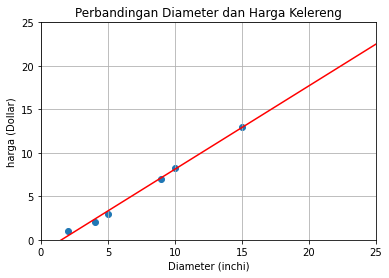

In [19]:
plt.scatter(x, y)
plt.plot(x_vis, y_vis, '-r')

plt.title("Perbandingan Diameter dan Harga Kelereng")
plt.xlabel("Diameter (inchi)")
plt.ylabel("harga (Dollar)")
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()

In [21]:
print(f"intercept:{model.intercept_}")
print(f"slope:{model.coef_}")

intercept:-1.4694566813509553
slope:[0.95814978]


In [23]:
#mencari nilai slope
print(f'x:\n{x}\n')
print(f'x flatten: {x.flatten()}\n')
print(f'y:{y}')

x:
[[ 5]
 [ 2]
 [ 4]
 [10]
 [15]
 [ 9]]

x flatten: [ 5  2  4 10 15  9]

y:[ 3.   1.   2.   8.3 13.   7. ]


In [35]:
#Variance
variance_x=np.var(x.flatten(), ddof=1)
print(f'variance: {variance_x}')

variance: 22.7


In [36]:
np.cov(x.flatten(), y)

array([[22.7       , 21.75      ],
       [21.75      , 20.96166667]])

In [38]:
covariance_xy = np.cov(x.flatten(), y)[0][1]
print(f'covariance:{covariance_xy}')

covariance:21.75


In [39]:
#nilai slope

slope = covariance_xy / variance_x
print(f'slope: {slope}')

slope: 0.9581497797356828


In [40]:
#Mencari Nilai Intercept
intercept = np.mean(y) - slope + np.mean(x)
print(f'intercept: {intercept}')

intercept: 12.258516886930984


In [43]:
#Prediksi Harga Kelereng Berdasarkan Diameter
diameter_kelereng = np.array([5,10,19]).reshape(-1,1)
diameter_kelereng

array([[ 5],
       [10],
       [19]])

In [44]:
prediksi_hrg =model.predict(diameter_kelereng)
prediksi_hrg

array([ 3.32129222,  8.11204112, 16.73538913])

In [46]:
for dmtr, hrg in zip(diameter_kelereng, prediksi_hrg):
    print(f'diameter : {dmtr} prediksi hrg: {hrg}')

diameter : [5] prediksi hrg: 3.321292217327459
diameter : [10] prediksi hrg: 8.112041116005873
diameter : [19] prediksi hrg: 16.735389133627017


In [65]:
#Evaluasi Simple Linear Regression Model Training & Testing Dataset
x_train = np.array([6,8,10,14,18]).reshape(-1,1)
y_train = np.array([7,9,13,17.5,20])

x_test = np.array([3,5,2,6,10,12]).reshape(-1,1)
y_test = np.array([12,8.1,17,9,6])

In [66]:
#Training Simple Linear Regression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [70]:
from sklearn.metrics import r2_score

y_pred = model.predict(x_test)

r_squared =r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

ValueError: Found input variables with inconsistent numbers of samples: [5, 6]